# EPE Tracker Tool

## How to run

Click Run > Run all cells in the toolbar in the top left above

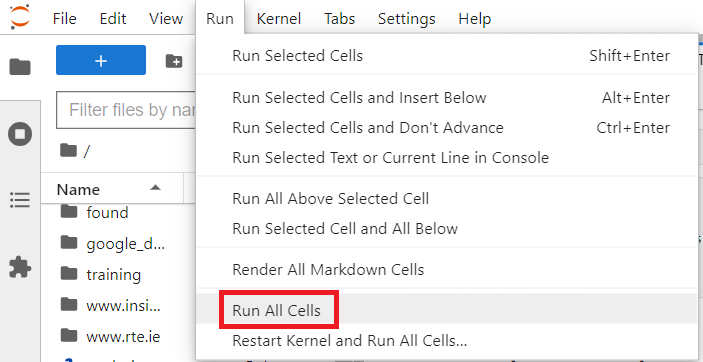

## Expected Input

This notebook expects files "probability_weights_tweets.json" and "probability_weights_article.json", an example of which is provided below:

```
{
  "initial": 0.3,
  "threshold": 0.75,
  "users": {
    "insight_centre": 0.9,
    "job_ie": -0.8
  },
  "hashtags": {
    "epe": 0.8,
    "jobfairy": -0.8
  },
  "words": {
    "speech": 0.5,
    "advertisement": -0.2
  }
}
```

The initial and threshold keys are values between 0 and 1 representing the probability to begin with and the probability above which should be considered an EPE event respectively. The users, hashtags and words maps all allow the user to provide positive and negative weights to be used in the running of the program. There is no need to provide the hashtags or users keys in probability_weights_article.json.

This notebook also expects an "env.json" file, an example of which is shown below:

```
{
  "start_date": {
    "year": 2022,
    "month": 1,
    "day": 1
  },
  "end_date": {
    "year": 2022,
    "month": 1,
    "day": 8
  },
  "podcast_id": "0HTattjY2kXo9zywjNW8Mk",
  "audience_estimate": {
    "twitter": "unknown",
    "insight_website": "unknown",
    "podcast": 500,
    "brainstorm": 2000,
    "silicon_republic": 1000,
    "external": {
      "irishtimes": 3000,
      "irish times": 3000
    }
  },
  "people": {
    "Georgiana Ifrim": {
      "twitter": "heerme"
    }
  },
  "pages": {
    "Insight Centre": {
      "twitter": "insight_centre"
    }
  },
  "twitter_consumer_key": "...",
  "twitter_consumer_secret": "...",
  "twitter_access_token": "...",
  "twitter_access_token_secret": "...",
  "spotify_client_id": "...",
  "spotify_client_secret": "..."
}
```

The start_date key should be the date you would like to start collecting from, with the end_date key being the final day you would like to collect on - All events will therefore be collected from start_date to end_date.

The podcast_id key is the ID of the podcast you would like to collect the episodes on Spotify. This can be got by visiting the podcast on the spotify website. Eg. https://open.spotify.com/show/0HTattjY2kXo9zywjNW8Mk means our ID is 0HTattjY2kXo9zywjNW8Mk

The audience_estimate key is used to provide estimates of the number of people reached by an event. There should be a key for each of the core sources (twitter, insight_website, podcast, brainstorm and silicon republic currently) as well as an external key which allows a list of sites like Irish Times, RTÉ, The Journal to be specified. 

The people key is a map of people (key) and their twitter handles (value). These are the researchers we are trying to find events for.

The pages key is a map of pages (key) and their twitter handles (value) and allows extra Twitter accounts to be collected from without allowing "Insight Centre" to be found to be conducting EPE.

The various id's, keys, tokens and secrets at the bottom are used to interact with the spotify and twitter APIs. These should not be changed unless you are making your own version of the tool, in which case you should generate new keys and tokens as set out in the Twitter and Spotify API Documentation.

## Collection

### Brainstorm Collection

Dependencies:

In [ ]:
! wget https://www.rte.ie/brainstorm/ -r -E -p --no-parent --accept-regex ".*/brainstorm/20[0-9]{2}/.*"
!pip install newspaper3k

Code:

In [ ]:
%run -i collect_brainstorm.py

### Insight Website Collection

Dependencies:

In [ ]:
! wget https://www.insight-centre.org/news/ -r -E -p
!pip install newspaper3k

Code:

In [ ]:
%run -i collect_insight_website.py

### Podcast Collection

Dependencies:

In [ ]:
!pip install requests --upgrade
!pip install urllib3 --upgrade
!pip install spotipy --upgrade

Code:

In [ ]:
%run -i collect_podcast.py

### Silicon Republic Collection

Should be run once a week ideally
 

Dependencies:

In [ ]:
!pip install newspaper3k

Code:

In [ ]:
%run -i collect_silicon_republic.py

### Twitter Collection

Dependencies:

In [ ]:
!pip install tweepy
!pip install wordninja
!pip install emoji

Code:

In [ ]:
%run -i collect_tweets.py

## Analysis

Dependencies:

In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm
import nltk
import spacy
  
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

!pip install python-dateutil
!pip install magicdate
!pip install newspaper3k
!pip install pycountry
!pip install locationtagger

Code:

In [ ]:
%run -i analysis.py

## Output

In [ ]:
print("Identified", sum(len(x) for x in slim_output["found_epe"].values()), "events by", len(slim_output["found_epe"]), "people with", len(slim_output["unknown_epe"]), "other unknown events")

In [ ]:
from IPython.display import JSON
JSON(slim_output["found_epe"])

In [ ]:
JSON(slim_output["unknown_epe"])

In [ ]:
JSON(slim_output["duplicates"])